#MODELOS DE DIFUSION

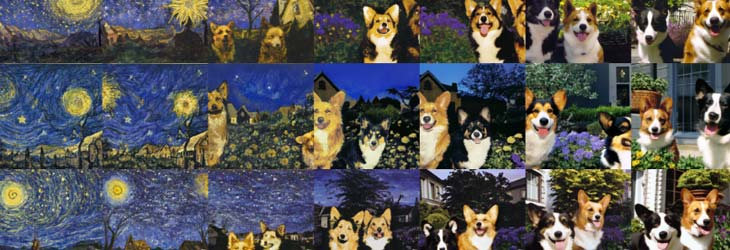

Los modelos de difusión son un tipo de **modelo generativo** de datos que se basan en el **concepto de difusión en termodinámica**, que consiste en el movimiento aleatorio de las partículas de una sustancia desde una región de mayor concentración a otra de menor concentración.


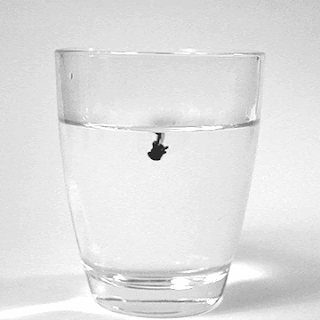

 Los modelos de difusión funcionan replicando el proceso del **concepto de difusión en termodinámica**, es decir, a partir de una imagen, se va añadiendo ruido a ésta hasta tener una imagen totalmente llena de ruido, y después aprendiendo cómo revertir este proceso. Para ello, se utiliza una red neuronal que aprende a generar la imagen objetivo a partir del ruido, eliminando el ruido gradualmente.

 Se basan en dos procesos: uno hacia delante, que añade ruido a una imagen inicial para generar los datos de entrenamiento, y otro hacia atrás, que reconstruye la imagen objetivo a partir del ruido usando una red neuronal

 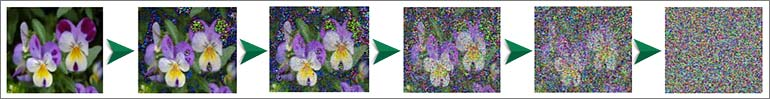

 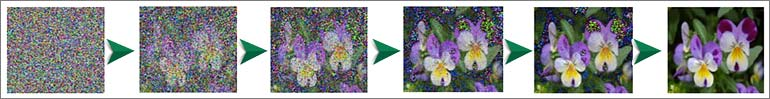

Los modelos de difusión tienen varias ventajas sobre otros modelos generativos, como las redes generativas antagónicas (GAN) o los autocodificadores variacionales (VAE), ya que son más estables, flexibles y fáciles de entrenar

Porque no sufren de problemas de colapso de modo o desvanecimiento de gradiente, que son comunes en las GAN y los VAE. También se podría decir que los modelos de difusión son más flexibles porque pueden generar imágenes de alta resolución y calidad con diferentes condiciones o estilos. Finalmente, se podría decir que los modelos de difusión son más fáciles de entrenar porque solo requieren una función de pérdida simple y no necesitan un discriminador o una distribución previa como las GAN o los VAE.

#Difusión de imágenes hacia delante y difusión hacia atrás


# Forware Process (difusión hacia delante).
El proceso de  **difusión hacia delante**, se hace en **T** pasos, produciendo así una secuencia **x0, x1, …, xT** de imágenes. En cada paso se introduce una pequeña cantidad de ruido gaussiano, es decir, ruido que sigue una distribución normal, de manera que cuando **T** tienda a infinito, xT sea únicamente ruido. El objetivo de la difusión hacia delante es generar las muestras de entrenamiento para el modelo de difusión y cabe destacar que cada paso de este proceso depende únicamente del anterior *q(xt| xt-1)*. A este tipo de procesos se les denomina cadenas de **Markov**.

    x0 --> imagen sin ruido
    xT --> imagen unicamente con ruido
    q(xt| xt-1) --> probabilidad de como sera la imagen xt a partir de la imagen xt-1





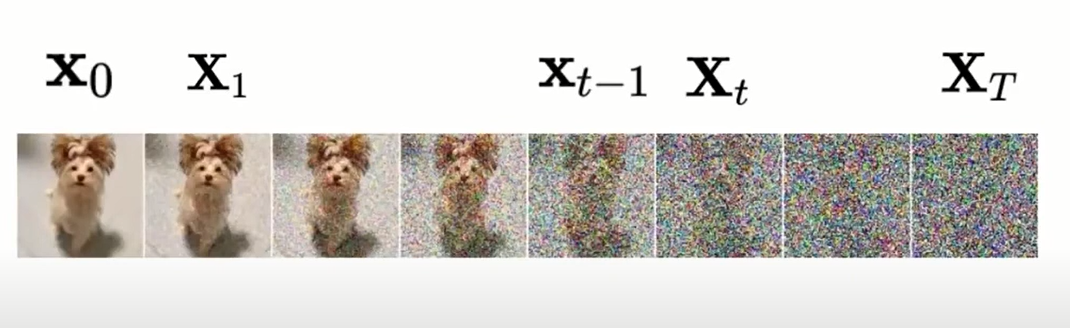

# Reverse Process (difusión hacia atrás).
Entonces, la "**difusión hacia atrás**" es el proceso que se usa para reconstruir una imagen menos ruidosa a partir de una imagen con ruido generado por el proceso de "**difusión hacia delante**". En este proceso, se utiliza una cadena de **Markov** en la que se realizan **T** pasos que siguen una distribución normal inversa *q(xt-1|xt)*, que es la probabilidad de cómo es la imagen sin ruido en el paso t-1 (xt-1), dada la imagen con ruido en el paso t (xt). El objetivo del entrenamiento de un modelo de difusión es calcular una aproximación *p(xt-1|xt)* lo más cercana posible a la distribución real *q(xt-1|xt)*, que permite obtener una imagen ligeramente menos ruidosa que la imagen con ruido en el paso t (xt). 

    q(xt-1|xt) --> Es la probabilidad de que la imagen en el paso t-1 sea xt-1 dado que la imagen en el paso t es xt.
    p(xt-1|xt) --> se refiere a la posibilidad de obtener la imagen sin ruido en el paso t-1 (xt-1), dada la imagen con ruido en el paso t (xt).

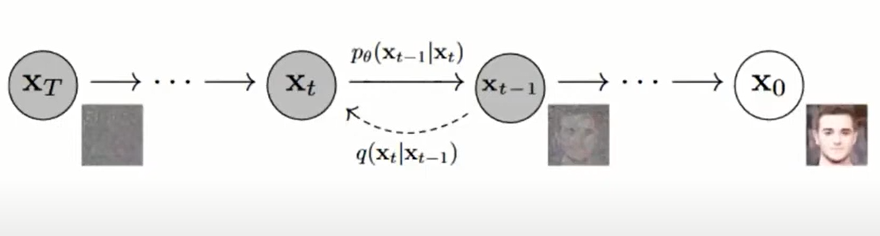

# ¿Cómo se entrena un modelo de difusión?

Lo que nos permite entrenar un modelo de difusión de una manera semi-supervisada siguiendo estos cinco pasos:
1. Se toma una imagen del conjunto de entrenamiento.
2. A dicha imagen se le aplica ruido aleatorio t De esta manera, se obtienen dos imágenes: xt y xt-1. xt, más ruidosa que la segunda, será la entrada del modelo.
3. Se le suministra al modelo como entrada la imagen xt y el valor de t.
4. Se calcula la pérdida entre la salida del modelo y la imagen xt-1.
5. A partir de la pérdida calculada, se modifican los pesos del modelo mediante descenso por gradiente.
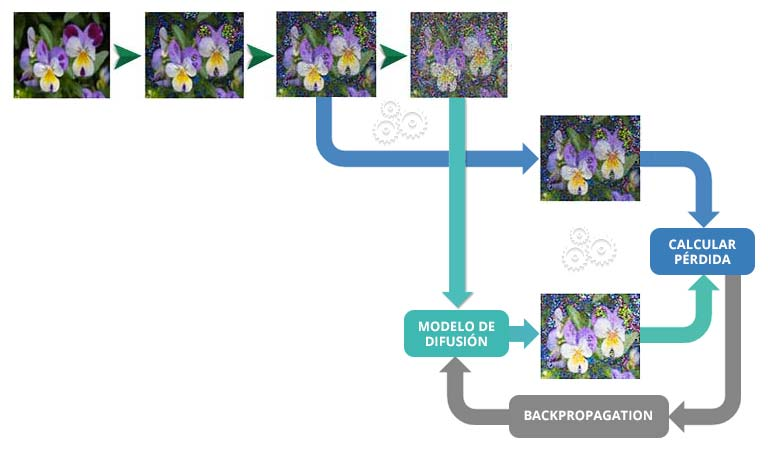

Este proceso se repite numerosas veces hasta que **el modelo aprende a deshacer el proceso de difuminación**. En este punto cabe preguntarse qué arquitectura tienen este tipo de modelos.

# Arquitectura de un modelo de difusión
Hay diferentes opciones para diseñar esta red neuronal, pero habitualmente se usa algún tipo de variante de la arquitectura U-net. La idea principal de la U-net es reducir la imagen mediante varios bloques convolucionales (combinaciones de una capa convolucional, una función de activación y una capa de pooling) y posteriormente deshacer este proceso de la misma manera. De esta forma, se preserva la información espacial y semántica de la imagen en cada paso del proceso hacia atrás.
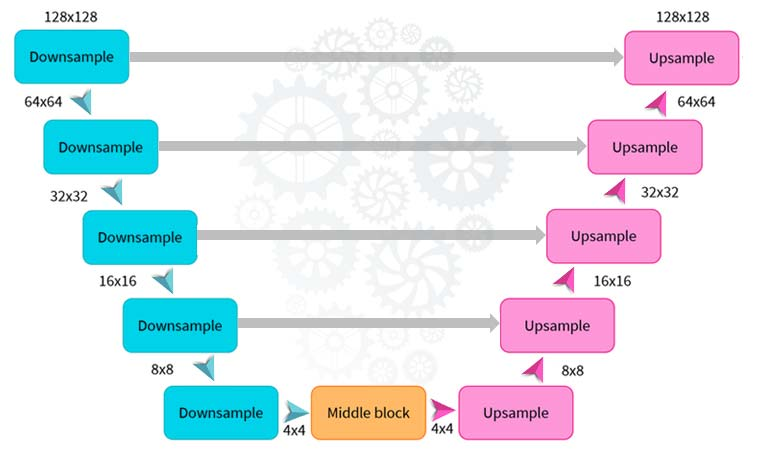

La arquitectura U-net tiene la forma de una U, con una parte descendente que reduce la imagen y una parte ascendente que la aumenta. Además, tiene conexiones residuales entre las capas correspondientes de ambas partes, lo que facilita el flujo de información y el aprendizaje. 

# Entrenando un modelo de difusión guiada por texto (STABLE DIFFUSION)
Stable Diffusion es un concepto que se refiere a la capacidad de generar imágenes a partir de ruido y palabras, utilizando una red neuronal que aprende a reconstruir la imagen paso a paso. Es un tipo de modelo generativo de datos que se basa en la idea de difusión inversa, que es el proceso de eliminar el ruido de una imagen inicial que es solo ruido.
 

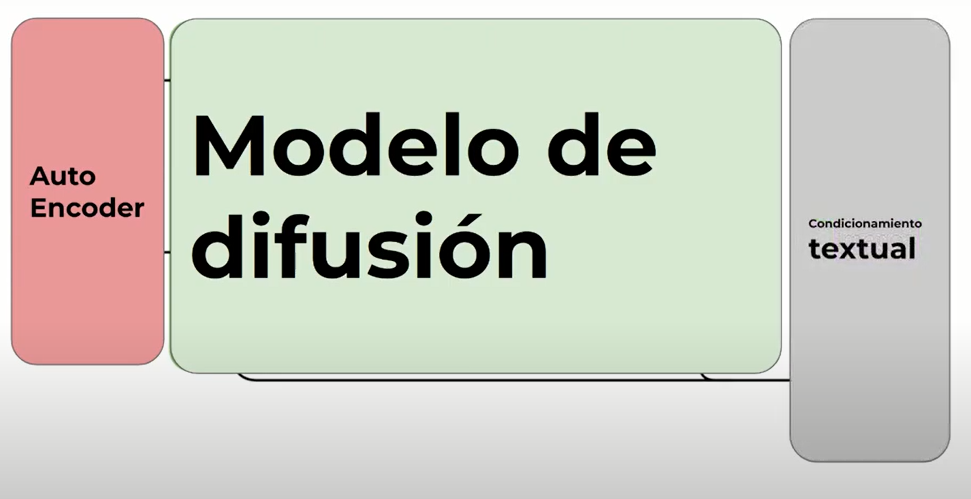

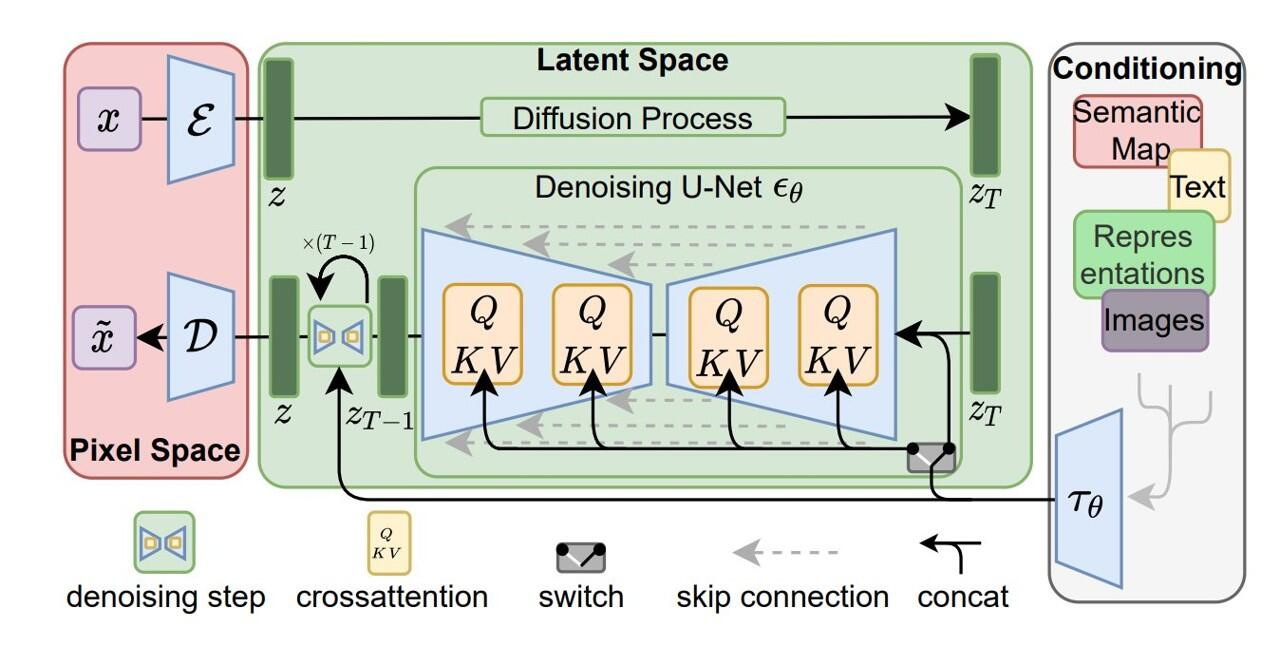

**Diffusion Process:**
Es el proceso de corrupción que se aplica a la imagen original para obtener la imagen difuminada. En cada paso del proceso, se añade un poco más de ruido gaussiano a la imagen, lo que hace que pierda calidad y detalle hasta que se vuelve irreconocible. El objetivo es que el modelo aprenda a revertir este proceso y recuperar la imagen original a partir de la imagen difuminada.

Para hacer esto, se usa un encoder que convierte la imagen difuminada en un vector numérico de baja dimensión, llamado vector latente. Este vector latente contiene la información esencial de la imagen, pero también tiene cierta variabilidad debido al ruido. El vector latente se usa como entrada para al denoising UNET, que lo refina y produce otro vector latente, condicionado por el texto de entrada. Este vector latente se pasa a un decoder, que genera una imagen de alta resolución a partir de él.

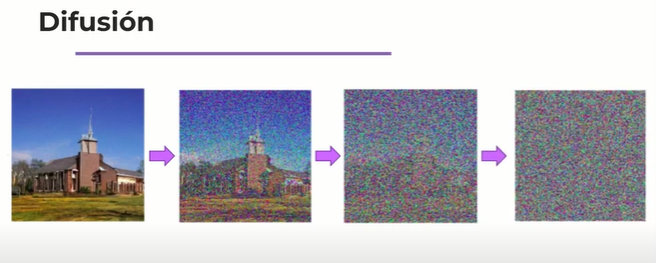

**Denoising U-NET**: El denoising UNET tiene la siguiente función:

* Recibir como entrada el vector latente de la imagen difuminada y el vector latente del texto codificado. El vector latente del texto codificado se obtiene con el CLIP, que es un modelo de lenguaje que puede relacionar texto e imágenes. El CLIP Tiene la capacidad de transformar el texto en un espacio vectorial que resume su significado. Este vector latente o espacio vectorial se usa como una condición para el denoising UNET, que lo combina con el vector latente de la imagen para generar una imagen que se ajuste al texto. 

* Usar el texto codificado como una condición para refinar el vector latente de la imagen y eliminar el ruido. El denoising UNET usa una arquitectura de tipo U-Net, que consiste en una parte de codificación y una parte de decodificación con conexiones residuales entre ellas. 

* Cuando se envía la imagen y el texto a la U-net, la U-net usa el texto para cambiar la imagen poco a poco hasta que se parezca a lo que dice el texto. Por ejemplo, si el texto dice “una casa de campo soleado”, la U-net cambia la imagen para que tenga la forma y el color de una casa de campo soleado. La U-net hace este cambio en el nivel de los números que representan la imagen, no en el nivel de los puntos de color que vemos en la pantalla. Esto hace que el cambio sea más rápido y exacto.

* Producir como salida otro vector latente que es enviada al decoder para generar los pixeles de la imagen.

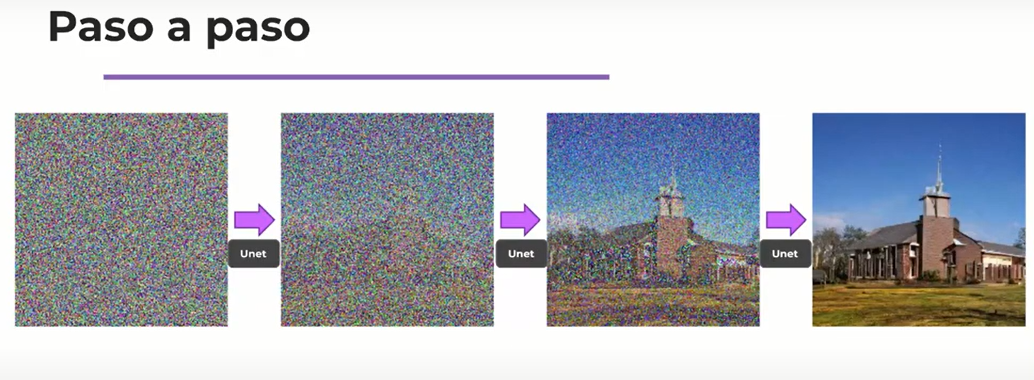

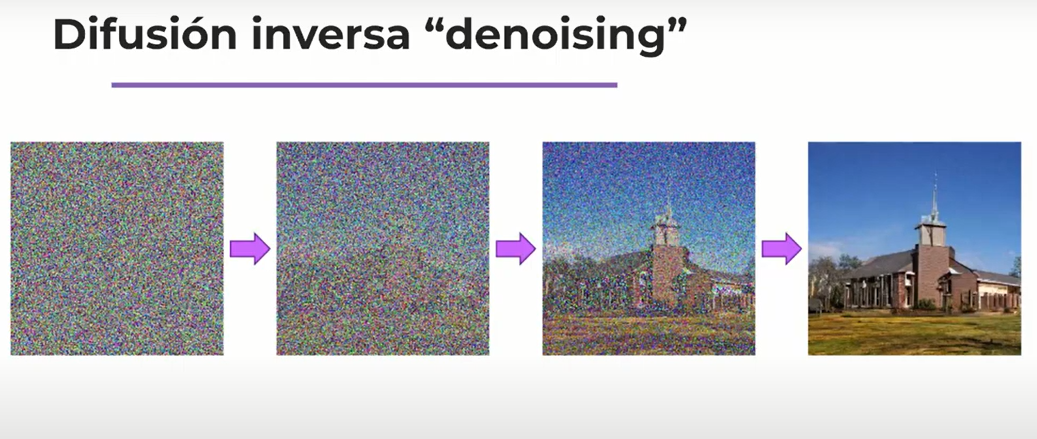

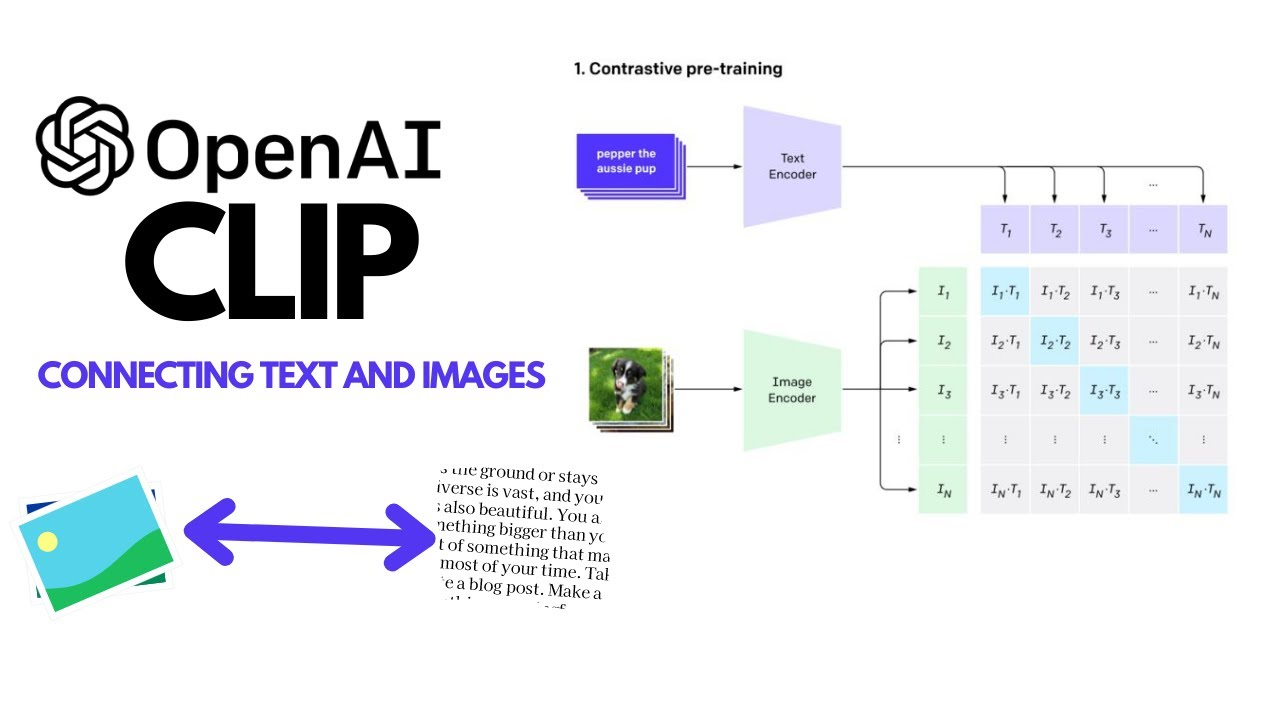


Para conseguir esto, CLIP anteriormente se ha entrena a partir de imágenes con sus correspondientes descripciones textuales, con el fin de que el vector que representa a un texto esté cerca de los vectores de las imágenes relacionadas con ese texto y lejos de los vectores de otras imágenes.

Para stable diffusion, solo el texto se envía al CLIP, y la imagen se envía directamente a la U-net. El CLIP no se vuelve a entrenar para stable diffusion, solo se usa como un codificador fijo.

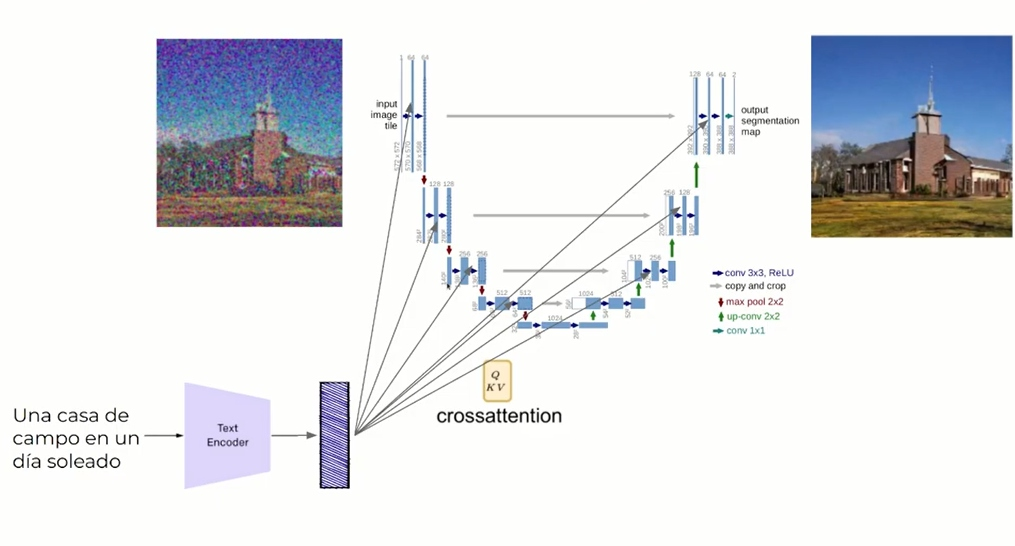

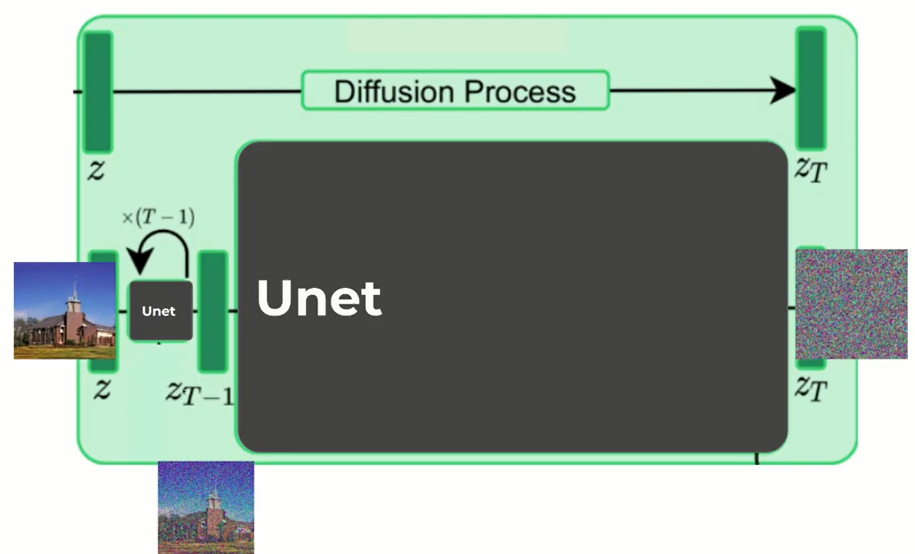

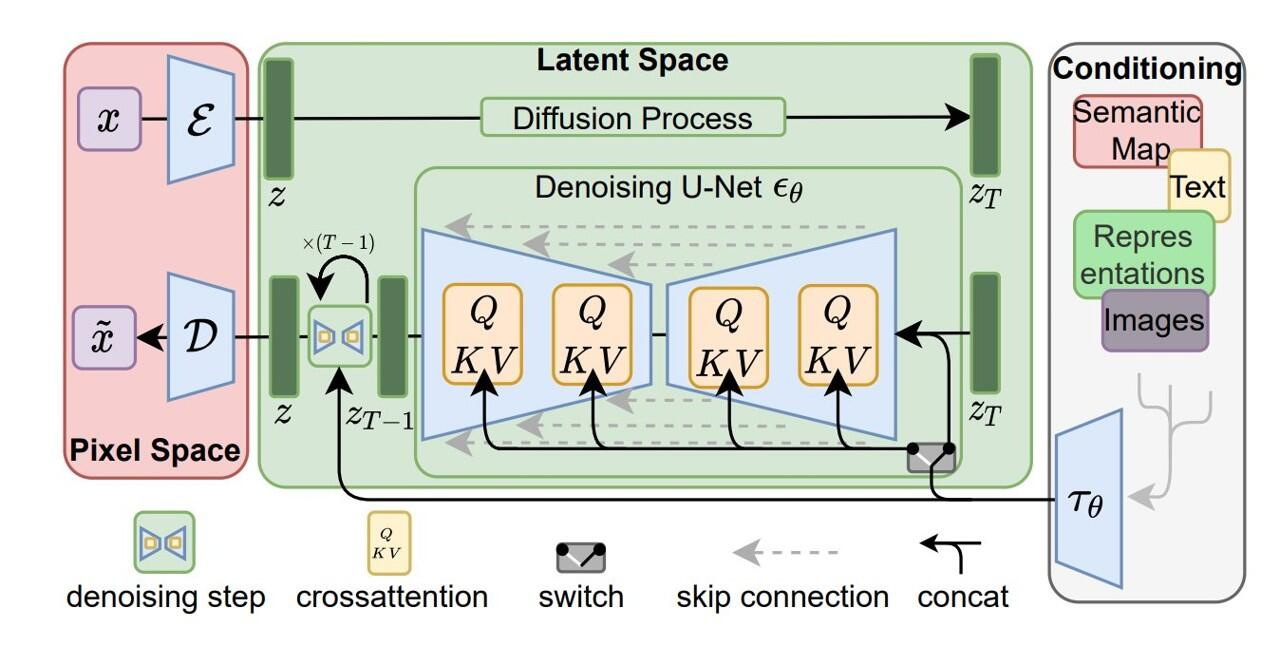

**Condicionamiento textual:** Esta es la forma de guiar al modelo de difusión para que genere imágenes que se ajusten al texto de entrada. El condicionamiento textual tiene cuatro componentes: el mapa semántico, el texto, las representaciones y las imágenes.

* El mapa semántico es una matriz que asigna cada píxel de la imagen a 
una categoría semántica, como persona, animal o edificio. El mapa semántico sirve para dar una estructura espacial a la imagen y para indicar qué objetos hay en ella. El mapa semántico se usa como una condición adicional para el decoder, que genera la imagen final.

* El texto es la descripción textual que se quiere convertir en imagen. El texto sirve para dar más detalles sobre los objetos, como el color, la forma o la posición. El texto se codifica con el CLIP. El texto codificado se usa como una condición adicional para el denoisign UNET, que refina el vector latente de la imagen.

* Las representaciones son los vectores latentes que se obtienen del encoder del autoencoder y del codificador de texto. El encoder del autoencoder convierte la imagen difuminada en un vector latente, y el codificador de texto convierte el texto en otro vector latente. Estos vectores latentes contienen la información esencial de la imagen y el texto, respectivamente. Las representaciones se concatenan y se pasan al denoisign UNET, que genera un nuevo vector latente que representa la imagen restaurada.

* Las imágenes son las imágenes de alta resolución que se generan a partir de las representaciones. Las imágenes se generan con un decoder que recibe como entrada el vector latente de la imagen, el vector latente del texto y el mapa semántico. El decoder usa estos tres elementos como condiciones para generar una imagen que sea coherente con el texto y el mapa semántico. El decoder usa capas convolucionales transpuestas para aumentar el tamaño de la imagen y generar los píxeles correspondientes al vector latente.

#DALLE
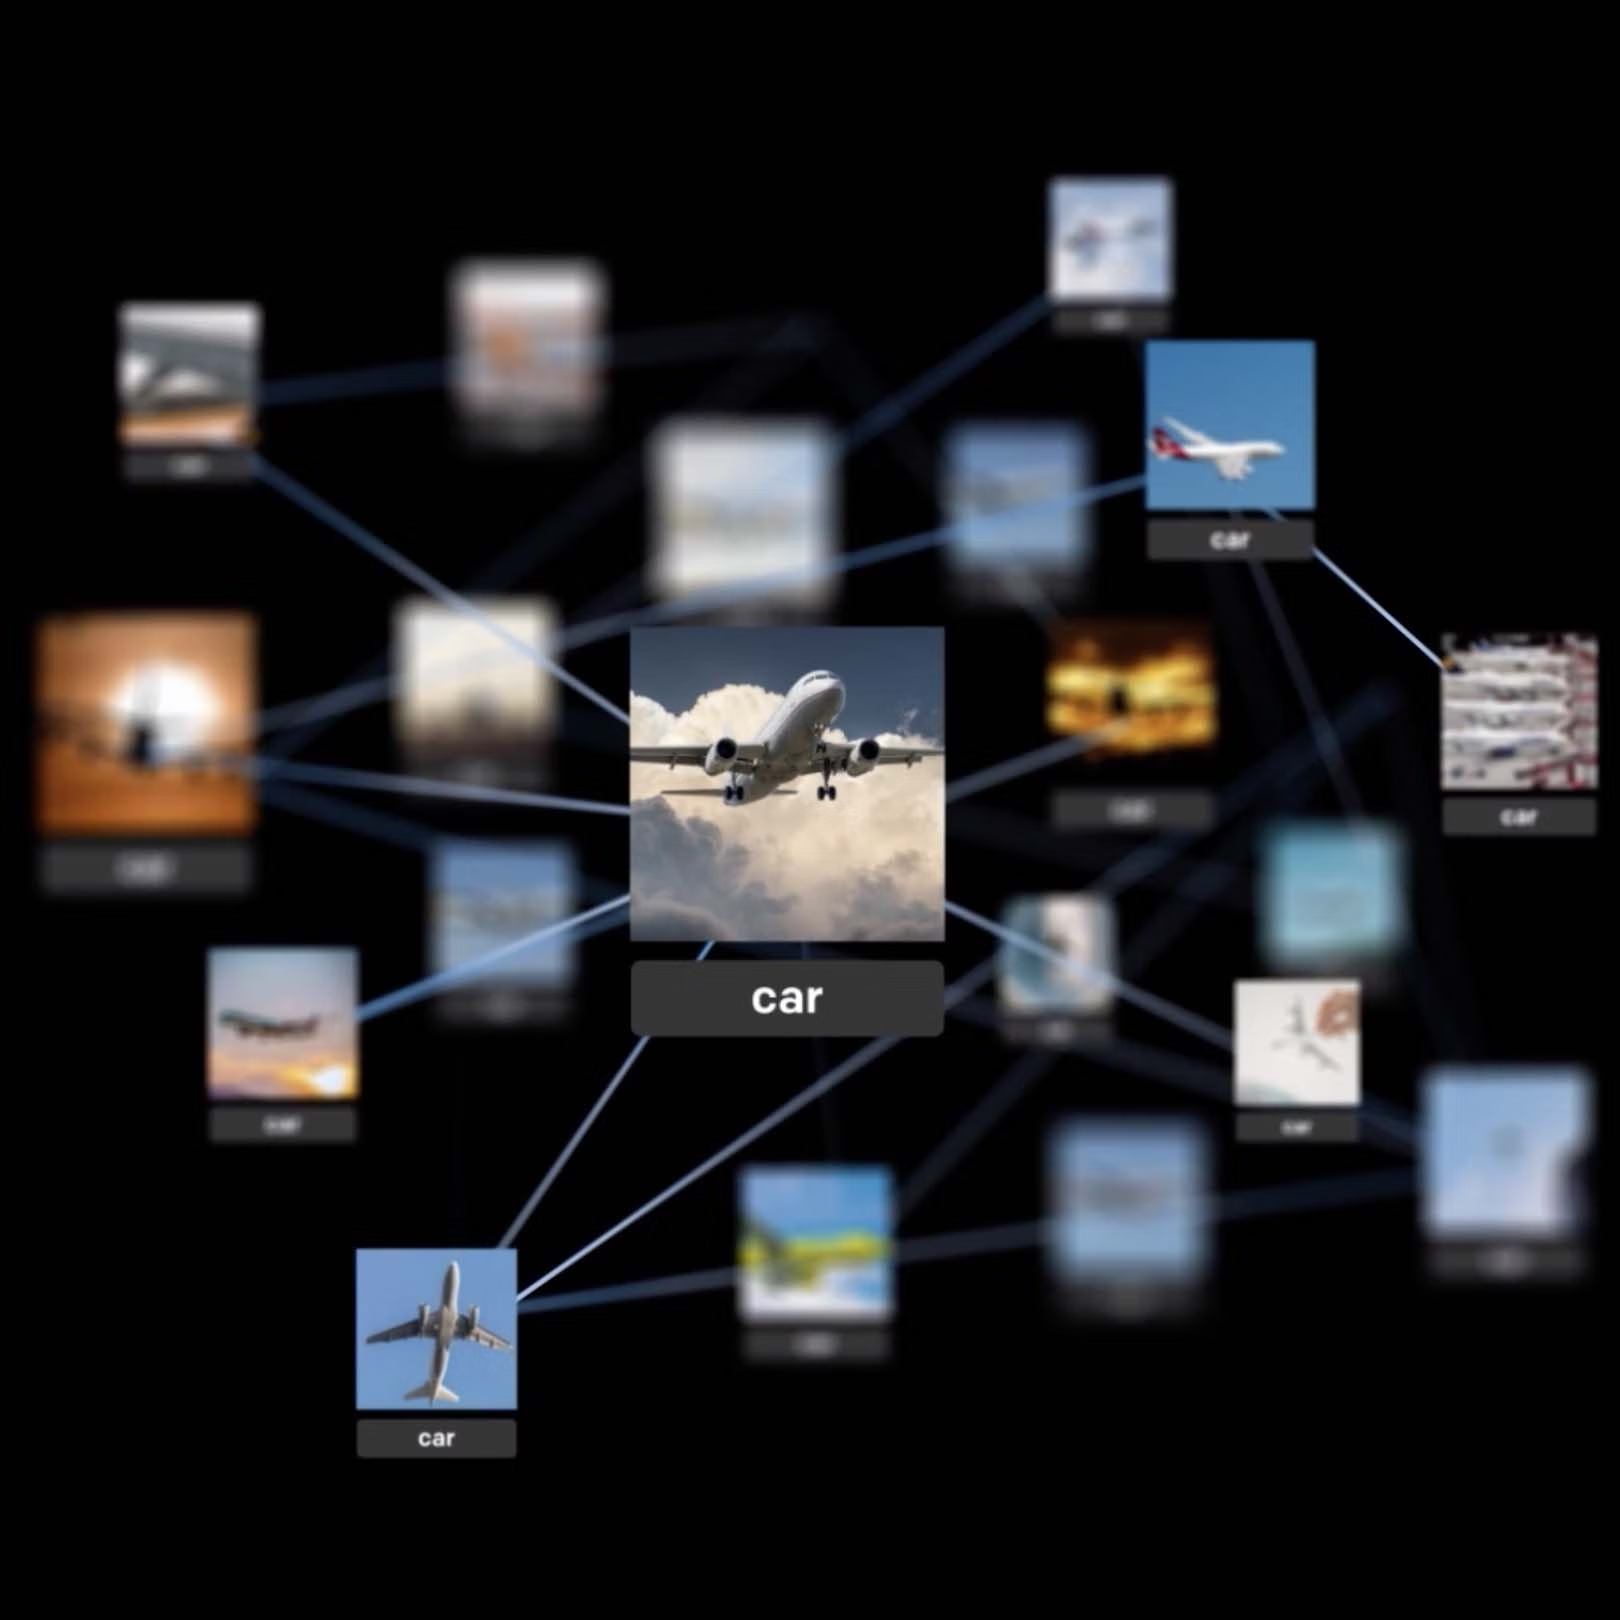 


**DALLE** utiliza un modelo de difusión para generar imágenes a partir de textos. Según la página web, **DALLE** es un modelo **encoder-decoder** que usa **CLIP** para codificar el texto y la imagen en un espacio común, y usa una arquitectura U-net para realizar el proceso de difusión hacia delante y hacia atrás. **DALLE** es similar a otros modelos de difusión como **DALL-E 2** o **Stable Diffusion**, **Midjourney** que también usan **CLIP** y U-net para crear imágenes artísticas o realistas.

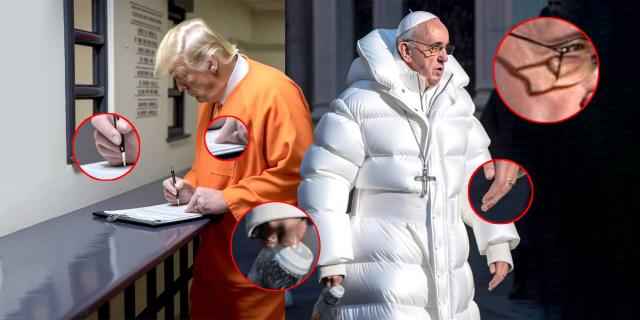

#Bibliografia
* [Paper Stable Difusion](https://openaccess.thecvf.com/content/CVPR2022/papers/Rombach_High-Resolution_Image_Synthesis_With_Latent_Diffusion_Models_CVPR_2022_paper.pdf)
* [Modelos de Difusion Expliaccion](https://impulsatek.com/los-modelos-de-difusion-claramente-explicados/)
* [Video Stable Diffusion](https://youtu.be/-uH0ffkTbas)
* [Video Modelos de Difusion](https://youtu.be/mNxzQvdVSQI)